In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [105]:
df = pd.read_csv('stage_data/prepped.csv')
df.drop(['school', 'conference'], axis=1, inplace=True)
df.head()

,seed,year,champion,rank,overall_wins,overall_losses,overall_win_loss_percentage,conference_wins,conference_losses,conference_win_loss_percentage,...,points,points per game,rebounds,rebounds per game,steals,steals per game,assists,assists per game,blocks,blocks per game
0,1,1985,0,2,35,3,0.921,14,2,0.875,...,0,0,0,0,0,0,0,0,1,0
1,16,1985,0,6,12,19,0.387,6,8,0.429,...,0,0,0,0,0,0,0,0,0,0
2,8,1985,0,2,25,6,0.806,15,3,0.833,...,0,0,0,0,0,0,0,0,0,0
3,9,1985,0,2,20,9,0.690,10,4,0.714,...,0,0,0,0,0,0,0,0,0,0
4,5,1985,0,2,23,10,0.697,10,6,0.625,...,0,0,0,0,0,0,0,0,0,0


In [106]:
df['rebounds per game'].sum()

0

In [107]:
df.drop(['rebounds per game'], axis=1, inplace=True)

In [108]:
df.columns

Index(['seed', 'year', 'champion', 'rank', 'overall_wins', 'overall_losses',
       'overall_win_loss_percentage', 'conference_wins', 'conference_losses',
       'conference_win_loss_percentage', 'own_points_per_game',
       'opp_points_per_game', 'strength_of_schedule', 'simple_rating_system',
       'ap_pre', 'ap_high', 'ap_final', 'conference_tournament_champion',
       'poy', 'points', 'points per game', 'rebounds', 'steals',
       'steals per game', 'assists', 'assists per game', 'blocks',
       'blocks per game'],
      dtype='object')

## Correlation

In [109]:
champ_corr = df.corr()[['champion']]
champ_corr

,champion
seed,-0.179994
year,-0.001026
champion,1.000000
rank,-0.049754
overall_wins,0.271552
overall_losses,-0.176920
overall_win_loss_percentage,0.200456
conference_wins,0.074411
conference_losses,-0.074594
conference_win_loss_percentage,0.078920


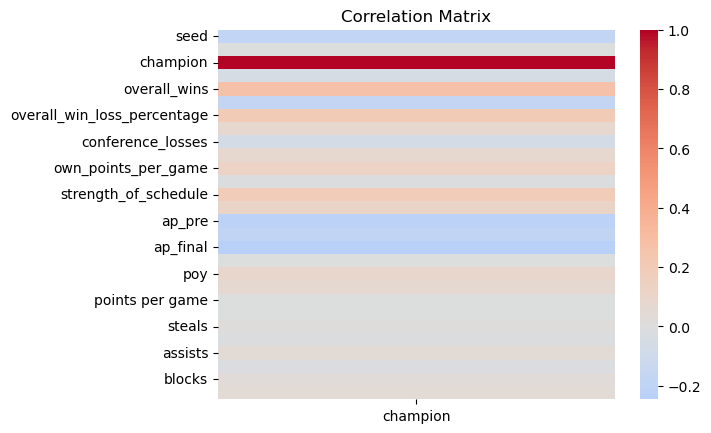

In [110]:
sns.heatmap(champ_corr, cmap="coolwarm", center=0)
plt.title("Correlation Matrix")
plt.show()

In [111]:
champ_corr[abs(champ_corr['champion']) >= 0.1]

,champion
seed,-0.179994
champion,1.000000
overall_wins,0.271552
overall_losses,-0.176920
overall_win_loss_percentage,0.200456
own_points_per_game,0.134121
strength_of_schedule,0.195906
simple_rating_system,0.117946
ap_pre,-0.220685
ap_high,-0.190824


In [112]:
champ_corr[abs(champ_corr['champion']) < 0.1]

,champion
year,-0.001026
rank,-0.049754
conference_wins,0.074411
conference_losses,-0.074594
conference_win_loss_percentage,0.078920
opp_points_per_game,-0.011550
conference_tournament_champion,0.001068
poy,0.085634
points,0.067850
points per game,-0.006140


## LASSO Regression

In [113]:
X = df.drop('champion', axis=1)
y = df['champion']

In [114]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [115]:
lr = LogisticRegression(penalty='l1', solver='liblinear', C=1.0)
lr.fit(X_scaled, y)


LogisticRegression(penalty='l1', solver='liblinear')

In [116]:
np.array(X.columns)[np.where(np.array(lr.coef_[0]) == 0)]

array(['seed', 'overall_losses', 'conference_win_loss_percentage',
       'opp_points_per_game', 'strength_of_schedule', 'points per game',
       'rebounds'], dtype=object)

In [117]:
np.array(X.columns)[np.where(np.array(lr.coef_[0]) != 0)]

array(['year', 'rank', 'overall_wins', 'overall_win_loss_percentage',
       'conference_wins', 'conference_losses', 'own_points_per_game',
       'simple_rating_system', 'ap_pre', 'ap_high', 'ap_final',
       'conference_tournament_champion', 'poy', 'points', 'steals',
       'steals per game', 'assists', 'assists per game', 'blocks',
       'blocks per game'], dtype=object)

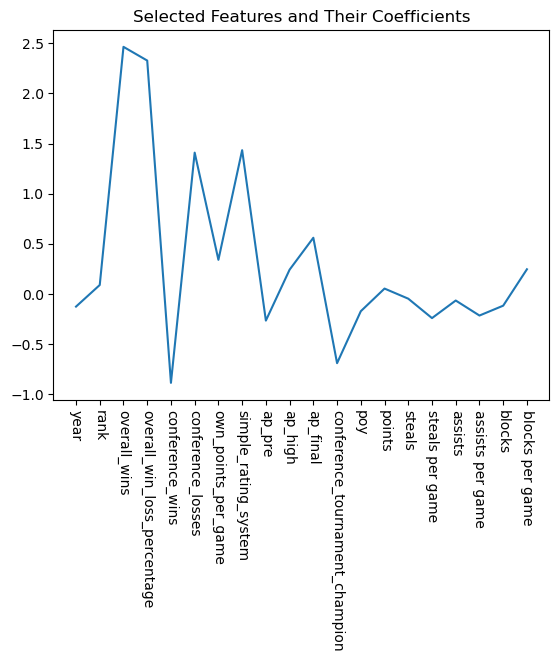

In [118]:
plt.plot(np.array(X.columns)[np.where(np.array(lr.coef_[0]) != 0)], np.array(lr.coef_[0])[np.where(np.array(lr.coef_[0]) != 0)])
plt.xticks(rotation=-90)
plt.title('Selected Features and Their Coefficients')
plt.show()

## Feature Selection

In [123]:
f = np.append(np.array(X.columns)[np.where(np.array(lr.coef_[0]) != 0)], "champion")
df[f].to_csv('stage_data/selected.csv', sep=',', index=False, encoding='utf-8')